# hide
title: jupekyll
enable: plotly

In [2]:
# hide
import sys
sys.path.insert(0, "..")

from nb_helpers import *

Hi there!

I am yet another jupyter notebook converted to some markdownish/webish thing, this time using jekyll and a couple of ad-hoc helper scripts.

While more and more terrible stupid cruel stuff seems to happen in the world, my author feels ever more pulled into coding and publishing stuff on github. Is he happy about Microsoft owning it? Not much. We will see.. 

So he's somewhat skilled in programming, knows a couple of libraries, reads more source and documentation than anything else on the web and knows about these *github pages*, even has tried it once or twice.

So here am i! IPython. Yet another random notebook converted to the web (the old or the new? we don't know).

To publish myself, author did
```bash
python post-notebook.py ./src/first-post.ipynb
```

To see if a couple of jupyter notebook tricks work in the blog he added a table of blocked requests of today's jekyll/jupyter related browsing  

In [42]:
# hide-code

s = Search("ufa-events-request").term("is_error", 1)
s = s.range("timestamp", gte="2021-03-01T08:00:00", lte="2021-03-02T03:00:00")
agg = s.agg_terms("host", field="url.host", size=50, min_doc_count=10)
agg = agg.agg_terms("type", field="type")
df = agg.execute().df(to_index=True, flat="type", exclude="*doc_count")
df = df.replace(np.nan, "", regex=True)
df.head(100)

,script,stylesheet,font,image,ping,beacon,other,main_frame
host,,,,,,,,
duckduckgo.com,155,57,40,23,,,,
use.typekit.net,,,93,,,,,
www.gravatar.com,,,,53,,,,
i.stack.imgur.com,,,,48,,,,
api.github.com,,,,,25,17,,
localhost,6,,,,,,34,2
nbconvert.readthedocs.io,38,,,,,,,
media.readthedocs.org,29,2,,,,,,
cdn.jsdelivr.net,29,,,,,,,


(They are blocked mostly thanks to umatrix)

Then he plotted the positions of his recorded mouse events of the past days into a png

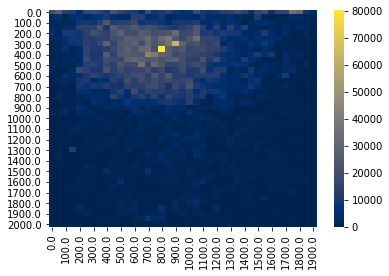

In [52]:
# hide-code
s = Search("ufa-events-mouse")
s = s.range("page_x", lte=2000).range("page_y", lte=2000)
agg = s.agg_histogram("page y", field="page_y", interval=50)
agg = agg.agg_histogram("page x", field="page_x", interval=50) \
    .metric_sum("movement", field="movement", return_self=True)
agg.execute()
plot.set_backend("matplotlib")
_ = agg.plot.heatmap(sort=True, replace={np.nan: 0}, )

and the average free parking places across germany during the last year via plotly

In [61]:
# hide-code

Search("parking-data") \
    .agg_date_histogram("per week", calendar_interval="week") \
    .metric_avg("free parking %", field="percent_free") \
    .execute().plot("per week", "free parking %", height=350)